## Croisement 3 - Croisement ports / partenaires commerciaux 

### Objectif : obtenir un diagramme alluvial qui représente le croisement entre ports Navigo dans lesquels on a des pointcalls 'In' (ce qu'on pourrait analyser comme des destinataires d'exports) et les partenaires commerciaux Toflit18 pour les flux concernant le sprint

=> RAWGraphs

In [1]:
from poitousprint import Portic, Toflit, get_pointcalls_port_as_toflit_partner

toflit_client = Toflit()
portic_client = Portic()

In [2]:
chosen_pointcall_actions = 'In'

In [3]:
# récupération de tous les ports navigo concernés

pointcalls_datasprint = portic_client.get_pointcalls(
 # year = 1789,
 # pointcall_admiralty = ['La Rochelle', 'Marennes', 'Sables d\'Olonne'],
 source_subset = 'Poitou_1789',
 pointcall_action = chosen_pointcall_actions
)

croisement_partners = get_pointcalls_port_as_toflit_partner(pointcalls_datasprint, 'partner_grouping')
print(croisement_partners[0:1])

[{'pkid': 93362, 'record_id': '00349916', 'pointcall': 'Arzon', 'pointcall_uhgs_id': 'A0145524', 'toponyme_fr': 'Arzon', 'toponyme_en': 'Arzon', 'latitude': '47.549033', 'longitude': '-2.893367', 'pointcall_admiralty': 'Vannes', 'pointcall_province': 'Bretagne', 'pointcall_states': '[{"1749-1815" : "France"}]', 'pointcall_substates': None, 'pointcall_states_en': '[{"1749-1815" : "France"}]', 'pointcall_substates_en': None, 'state_1789_fr': 'France', 'state_1789_en': 'France', 'substate_1789_fr': None, 'substate_1789_en': None, 'source_1787_available': False, 'source_1789_available': False, 'pointcall_status': None, 'shiparea': 'ACE-IROI', 'pointcall_point': '0101000020110F0000D5408190A0A813C166F399CFC6025741', 'ferme_direction': None, 'ferme_bureau': None, 'ferme_bureau_uncertainty': None, 'partner_balance_1789': None, 'partner_balance_supp_1789': 'France', 'partner_balance_1789_uncertainty': None, 'partner_balance_supp_1789_uncertainty': 0.0, 'pointcall_out_date': None, 'pointcall_act

In [5]:
# écriture des alignements dans un dict avec une ligne par match pour grossir les liens selon quantité de pointcalls concernés dans le diagramme alluvial
ports_navigo = []

for pointcall in croisement_partners: 
    # remplacer par "pas de partenaire commercial rattaché" plutot que None quand le port Navigo ne correspond pas à un partenaire Toflit18
    partner = pointcall['pointcall_as_toflit_partner']
    if partner is None:
        partner = "pas de partenaire commercial rattaché"
        
    ports_navigo.append({
        'port_navigo': pointcall['pointcall'],
        'toflit_partner':partner
    })

ports_navigo[0:10]

[{'port_navigo': 'Arzon', 'toflit_partner': 'France'},
 {'port_navigo': 'Côte de Bretagne', 'toflit_partner': 'France'},
 {'port_navigo': "Saint Michel en l' Herm", 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Esnandes', 'toflit_partner': 'France'},
 {'port_navigo': 'Le Plomb', 'toflit_partner': 'France'},
 {'port_navigo': 'Le Plomb', 'toflit_partner': 'France'},
 {'port_navigo': 'Oléron', 'toflit_partner': 'France'}]

In [6]:
# écriture dans un csv
import csv
from csv import DictWriter

# tableau qui contient une colonne par clé de dict 
with open('dumps/croisement_ports_' + str(chosen_pointcall_actions) + '_partners_datasprint.csv', 'w', newline='') as csvfile:
        fieldnames = ['port_navigo','toflit_partner']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for pointcall in ports_navigo:
            writer.writerow(pointcall)

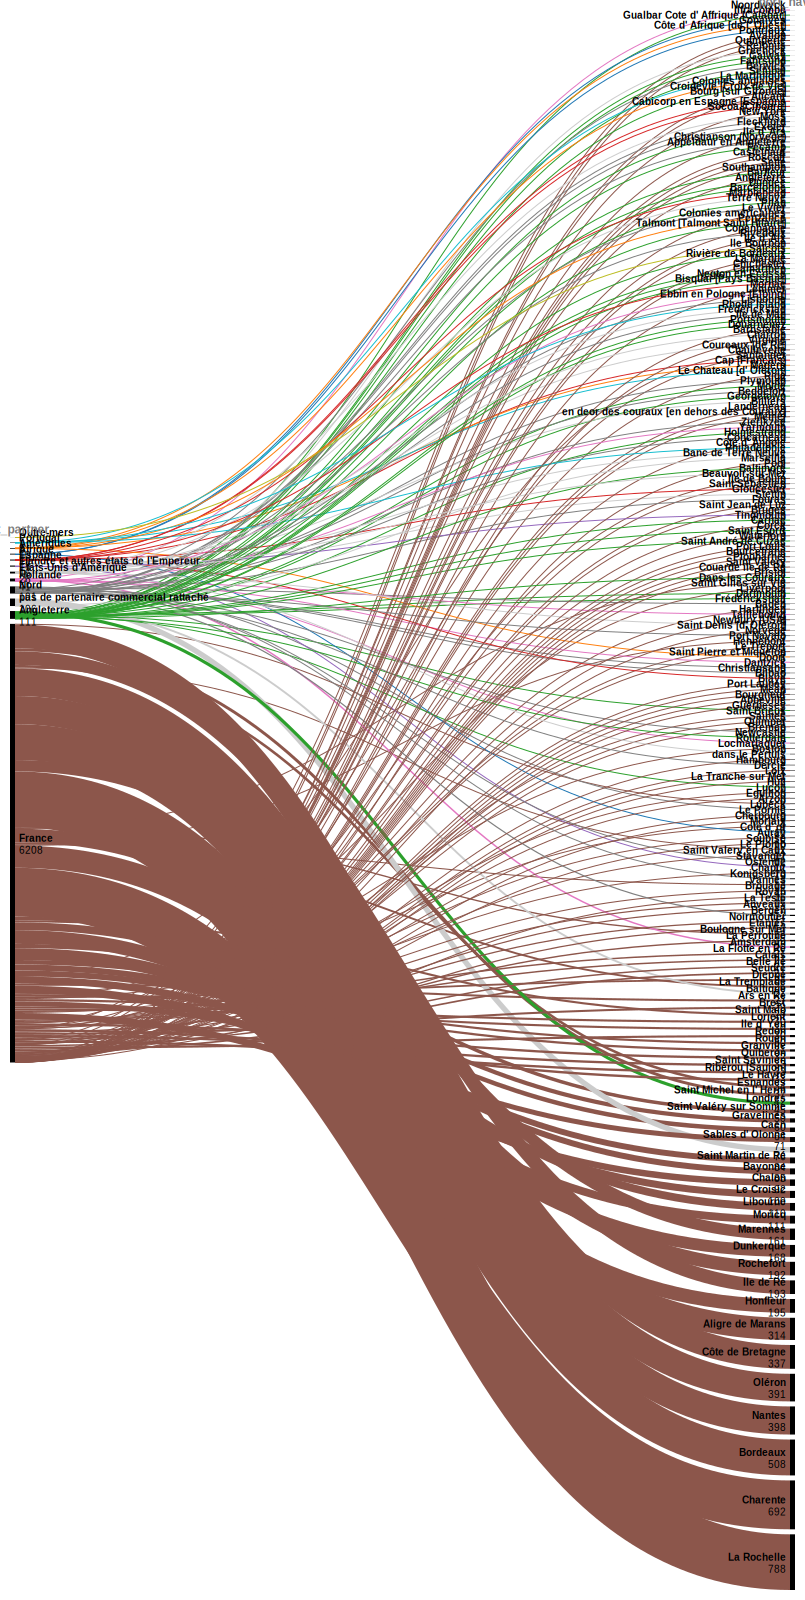

In [7]:
from IPython.core.display import SVG
SVG(filename='dumps/visualisations/croisement ports Portic : bureaux des Fermes Navigo - datasprint PORTIC 2021/diagramme_alluvial_ports_partners.svg')